# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
d1 = pd.read_csv('titanic_train.csv')
d1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1.1检测是否存在单列多值

In [3]:
d1.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


根据随机挑选的10个数据来看，每个列对应一个值，不存在结构性问题

### 1.2检测是否存在缺失值

In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age和Cabin存在缺失

In [5]:
d1[d1['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


由于观察值较多，且除缺失值外都还能提供较多信息，因此暂时保留信息，且年龄对后续分析提供重要作用，采用平均值填充缺失

In [6]:
d1_a = d1['Age'].mean()
d1_a

29.69911764705882

In [7]:
d1['Age'] = d1['Age'].fillna(d1_a)
d1['Age'].isna().sum()

0

In [8]:
d1[d1['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


由于船舱大部分都为缺失值，因此不能删除，且对结果的影响并不占主要因素，不纳入模型的变量内，故保留缺失值

### 1.3 检测是否存在值类型不当

In [9]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


ID和分类变量的类型需要变换

In [10]:
d1['PassengerId'] = d1['PassengerId'].astype('str')
d1['Sex'].astype('category')
d1['Survived'] = d1['Survived'].astype('category')
d1['Pclass'] = d1['Pclass'].astype('category')
d1['Embarked'] = d1['Embarked'].astype('category')


In [11]:
d1[d1['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


由于仅两条数据且除目标值外其余完整，并不会对模型的变量造成明显影响，因此暂时保留

In [12]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(2), object(5)
memory usage: 65.8+ KB


### 1.4 检测是否存在异常值 

In [13]:
d1.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


无异常

### 1.5 检测是否存在重复值

由于ID是唯一数据不可重复，因此需要检测

In [14]:
d1['PassengerId'].duplicated().sum()

0

无重复

### 1.6 检测是否含义相同值却不一致数据

In [15]:
d1['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [16]:
d1['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
d1['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
d1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

无不同意值

## 2. 探索数据和可视化

In [19]:
sns.set_palette('pastel')

In [20]:
d2 = d1.copy()
d2.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.000000,1,0,3101278,15.8500,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.000000,1,0,19943,90.0000,C93,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.000000,5,2,CA 2144,46.9000,NaN,S
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.000000,0,1,250644,19.5000,NaN,S
410,411,0,3,"Sdycoff, Mr. Todor",male,29.699118,0,0,349222,7.8958,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,29.699118,0,0,315037,8.6625,NaN,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.000000,0,0,C 17369,7.1417,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.000000,0,0,W/C 14208,10.5000,NaN,S
94,95,0,3,"Coxon, Mr. Daniel",male,59.000000,0,0,364500,7.2500,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.000000,1,2,113760,120.0000,B96 B98,S


研究认为SibSp和Parch可以合并为同行者，可尝试创建新列‘Family’

In [21]:
d2['Family'] = d2['SibSp'] + d2['Parch']
d2.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.000000,0,0,250655,26.0000,NaN,S,0
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,3
306,307,1,1,"Fleming, Miss. Margaret",female,29.699118,0,0,17421,110.8833,NaN,C,0
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.000000,0,2,36928,164.8667,C7,S,2
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,2
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.000000,0,2,11752,26.2833,D47,S,2
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.000000,2,2,W./C. 6608,34.3750,NaN,S,4
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.000000,0,0,7540,8.6542,NaN,S,0
324,325,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,CA. 2343,69.5500,NaN,S,10
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.000000,2,2,W./C. 6608,34.3750,NaN,S,4


### 2.1幸存情况

In [22]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.autolayout'] = True


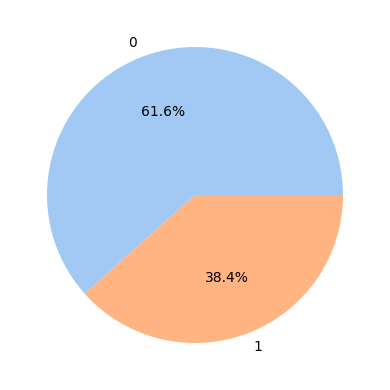

In [23]:
survived_count = d2['Survived'].value_counts()
survived_label = survived_count.index
plt.pie(survived_count, labels=survived_label, autopct='%.1f%%')
plt.show()

大多数乘客遇难

### 2.2年龄和幸存

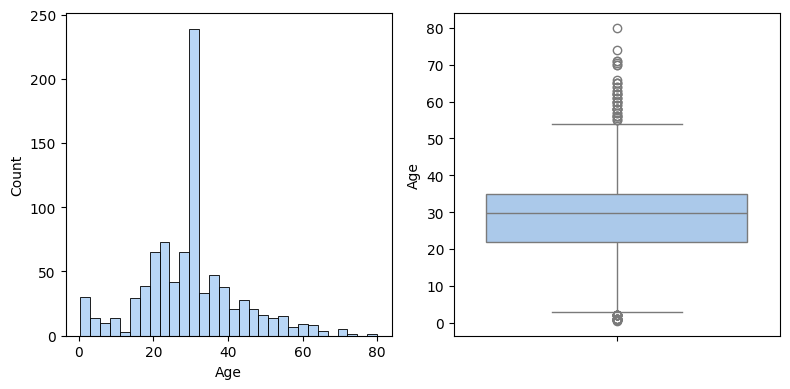

In [24]:
figure, axes = plt.subplots(1, 2)
sns.histplot(d2, x='Age', ax=axes[0])
sns.boxplot(d2, y='Age', ax=axes[1])
plt.show()

乘客年龄主要集中在20-40岁区间，呈现右偏态分布

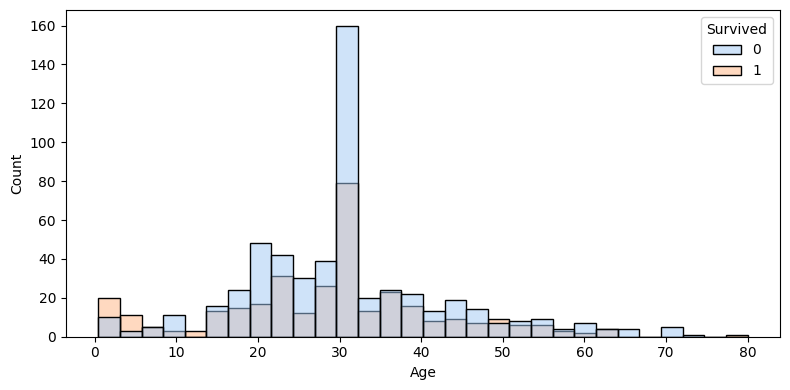

In [25]:
sns.histplot(d2, x='Age', hue='Survived')
plt.show()

仅10岁以下儿童存活比例较高，其他大多死亡率高于存活

### 2.3 船舱等级和幸存

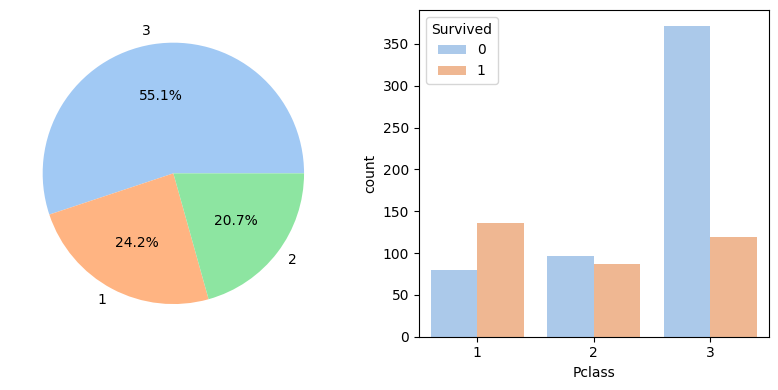

In [26]:
figure, axes = plt.subplots(1, 2)
pclass_count = d2['Pclass'].value_counts()
pclass_label = pclass_count.index
axes[0].pie(pclass_count, labels=pclass_label, autopct='%.1f%%')
sns.countplot(d2, x='Pclass', hue='Survived', ax=axes[1])
plt.show()


大部分为三等舱，而存活率一等舱较高，三等舱最低

### 2.4 性别与存活率

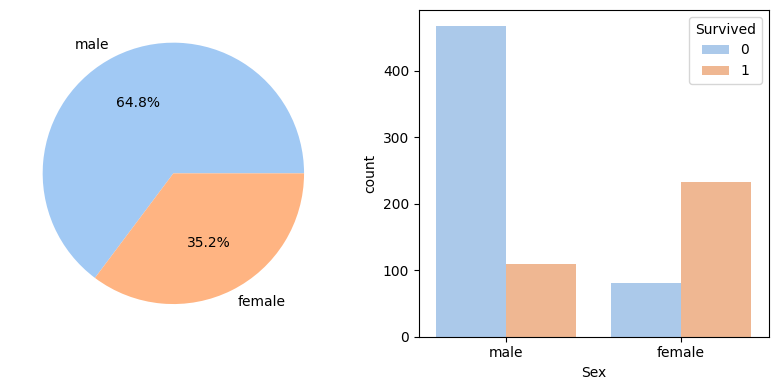

In [27]:
figure, axes = plt.subplots(1, 2)
m = d2['Sex'].value_counts()
fm = m.index
axes[0].pie(m, labels=fm, autopct='%.1f%%')
sns.countplot(d2, x='Sex', hue='Survived', ax=axes[1])
plt.show()

男性乘客占主要，且男性乘客的死亡率远高于存活率，女性则相反

### 2.5 船票与存活率

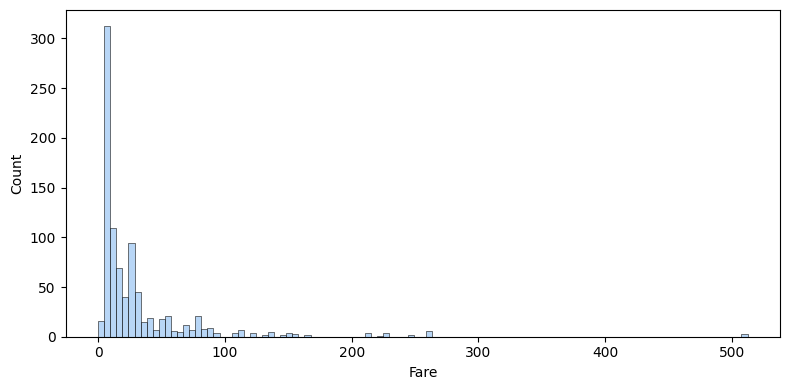

In [28]:
sns.histplot(d2, x='Fare')
plt.show()

数据呈右偏态分布，大部分票价中等，部分高价票拉高平均水平

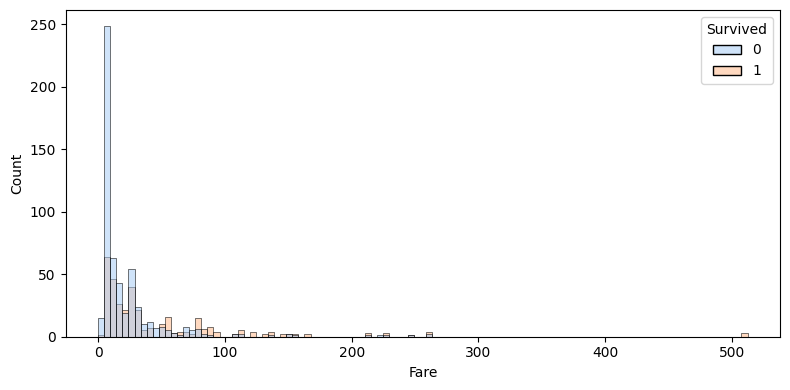

In [29]:
sns.histplot(d2, x='Fare', hue='Survived')
plt.show()

数据显示持有高价票的乘客存活几率更高

### 2.6 登船港口和存活率

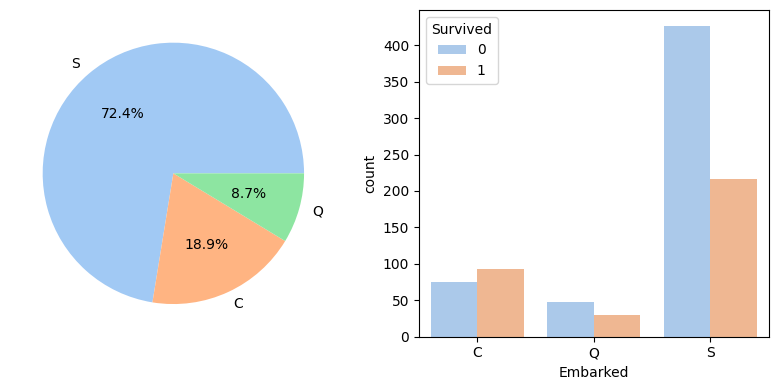

In [30]:
figure, axes = plt.subplots(1, 2)
e = d2['Embarked'].value_counts()
el = e.index
axes[0].pie(e, labels=el, autopct='%.1f%%')
sns.countplot(d2, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

从南安普顿出发的客户人数最多；只有瑟登堡出发的乘客存活率大于死亡率，其余相反

### 2.7 同行人数量与存活率

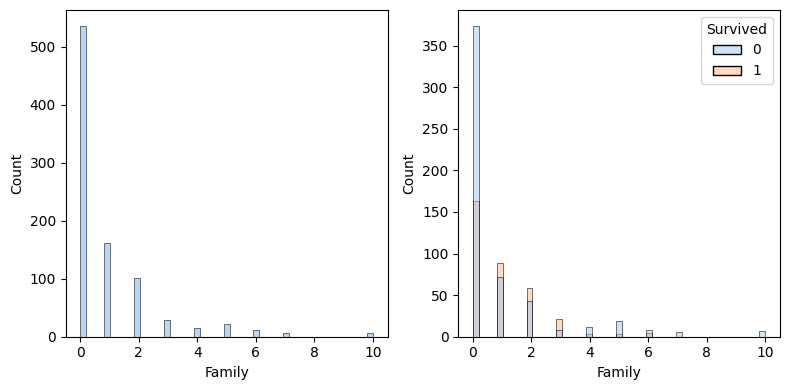

In [31]:
figure, axes = plt.subplots(1, 2)
sns.histplot(d2, x='Family', ax=axes[0])
sns.histplot(d2, x='Family', hue='Survived', ax=axes[1])
plt.show()

单身乘客多于带家眷的；家人数量在1-3之间的存活率较高，其余相反

## 3. 数据分析

In [32]:
d3 = d2.copy()
d3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


### 3.1 清除不会对模型造成明显影响的变量

In [33]:
d3 = d3.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
d3.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
125,1,3,male,12.000000,1,0,11.2417,C,1
229,0,3,female,29.699118,3,1,25.4667,S,4
736,0,3,female,48.000000,1,3,34.3750,S,4
727,1,3,female,29.699118,0,0,7.7375,Q,0
341,1,1,female,24.000000,3,2,263.0000,S,5
461,0,3,male,34.000000,0,0,8.0500,S,0
706,1,2,female,45.000000,0,0,13.5000,S,0
36,1,3,male,29.699118,0,0,7.2292,C,0
479,1,3,female,2.000000,0,1,12.2875,S,1
481,0,2,male,29.699118,0,0,0.0000,S,0


In [34]:
d3 = pd.get_dummies(d3, columns=['Pclass', 'Sex', 'Embarked'], dtype=int, drop_first=True)
d3.sample(10)

,Survived,Age,SibSp,Parch,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
452,0,30.000000,0,0,27.7500,0,0,0,1,0,0
170,0,61.000000,0,0,33.5000,0,0,0,1,0,1
182,0,9.000000,4,2,31.3875,6,0,1,1,0,1
59,0,11.000000,5,2,46.9000,7,0,1,1,0,1
462,0,47.000000,0,0,38.5000,0,0,0,1,0,1
722,0,34.000000,0,0,13.0000,0,1,0,1,0,1
811,0,39.000000,0,0,24.1500,0,0,1,1,0,1
359,1,29.699118,0,0,7.8792,0,0,1,0,1,0
421,0,21.000000,0,0,7.7333,0,0,1,1,1,0
34,0,28.000000,1,0,82.1708,1,0,0,1,0,0


### 3.2 设置因变量和自变量

In [35]:
y = d3['Survived']

In [36]:
x= d3.drop(['Survived'], axis=1)
x.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Age,True,False,False,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False,False,False
Parch,False,False,True,False,False,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False,False,False
Family,False,True,False,False,True,False,False,False,False,False
Pclass_2,False,False,False,False,False,True,False,False,False,False
Pclass_3,False,False,False,False,False,False,True,False,False,False
Sex_male,False,False,False,False,False,False,False,True,False,False
Embarked_Q,False,False,False,False,False,False,False,False,True,False
Embarked_S,False,False,False,False,False,False,False,False,False,True


In [37]:
x = x.drop(['Parch', 'SibSp'], axis=1)

In [38]:
x = sm.add_constant(x)

### 3.3 构建函数模型

In [39]:
model = sm.Logit(y, x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.440917
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.3379
Time:                        20:41:20   Log-Likelihood:                -392.86
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.179e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0970      0.476      8.606      0.000       3.164       5.030
Age           -0.0385      0.008     -4.903      0.000      -0.054      -0.023
Fare           0.0025      0.002      0.994      0.320      -0.002       0.007
Family        -0.2211      0.068     -3.230      0.001      -0.355      -0.087
Pclass_2      -0.9031      0.297     -3.043      0.002      -1.485      -0.321
Pclass_3      -2.1336      0.297     -7.178      0.000      -2.716      -1.551
Sex_male      -2.7335      0.200    -13.647      0.000      -3.126      -2.341
Embarked_Q    -0.0680      0.380     -0.179      0.858      -0.813       0.677
Embarked_S    -0.4684      0.239     -1.960      0.050      -0.937      -0.000
==============================================================================
"""

当显著水平位0.05时，模型认为船票价格和港口对结果没有影响

因此，删除无影响变量

In [40]:
x = x.drop(['Fare', 'Embarked_Q', 'Embarked_S'], axis=1)
model = sm.Logit(y, x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.3323
Time:                        20:41:21   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
Family        -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

模型认为，以下自变量的增加都会降低幸存概率：年龄，同行人数，不在一等舱，性别男

### 3.4 计算系数的具体意义

In [41]:
np.exp(-0.0395)

0.9612699539905982

每增加一岁降低约4%生存率

In [42]:
np.exp(-0.2186)

0.803643111115195

每多一个家庭成员降低约20%生存率

In [43]:
np.exp(-1.1798)

0.30734020049483596

二等舱生存率降低约70%

In [44]:
np.exp(-2.3458)

0.09577055503172162

三等舱生存率降低近90%

In [45]:
np.exp(-2.7854)

0.061704402333015156

男性生存率比女性降低94%

总结：年龄高者，家庭成员多者，非头等舱者，男性的生存概率更低

高龄与男性生存低可能主要因为妇女与儿童先救的原则；头等舱意味着逃生的机会或环境更优越；家庭成员较多者可能会在灾难中优先确保家人的安危而降低自己的生存率

## 4. 预测

In [46]:
d4 = pd.read_csv('titanic_test.csv')
d4

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 4.1 确保数据干净

In [47]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [48]:
d4_m = d4['Age'].mean()
d4_m

30.272590361445783

In [49]:
d4['Age'] = d4['Age'].fillna(d4_m)
d4['Age'].isna().sum()

0

In [50]:
d4['Sex'] = pd.Categorical(d4['Sex'], categories=['female', 'male'])
d4['Pclass'] = pd.Categorical(d4['Pclass'], categories=['1', '2', '3'])

In [52]:
d4 = pd.get_dummies(d4, columns=['Pclass', 'Sex'], dtype=int, drop_first=True)
d4.head(5)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0


In [53]:
d4['Family'] = d4['SibSp'] + d4['Parch']
d4.head(5)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,Family
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2


### 4.2 预测

In [54]:
model.params

const       4.061982
Age        -0.039495
Family     -0.218627
Pclass_2   -1.179763
Pclass_3   -2.345823
Sex_male   -2.785398
dtype: float64

In [67]:
x_p = d4[['Age', 'Family', 'Pclass_2', 'Pclass_3', 'Sex_male']]
x_p = sm.add_constant(x_p)

In [69]:
R = model.predict(x_p)
R

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

获得预测结果后可以将高于0.5的值归为生存，低于归为死亡

In [70]:
R > 0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool